In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [154]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [155]:
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [156]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# First, we should understand which gender is dominating in purchase

## Visualization using sns


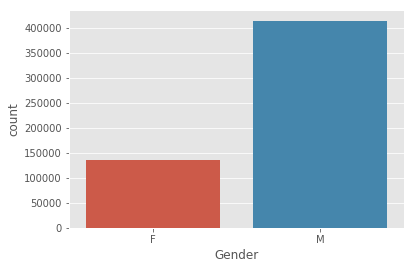

In [158]:
sns.countplot(train['Gender'])

### Here we saw that man are purchasing more products.
### Now we will check for married man or singal

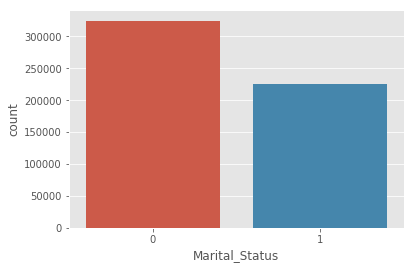

In [159]:
sns.countplot(train['Marital_Status'])

### Here singals are purchasing more products compared to married
### Now we will compare the age groups

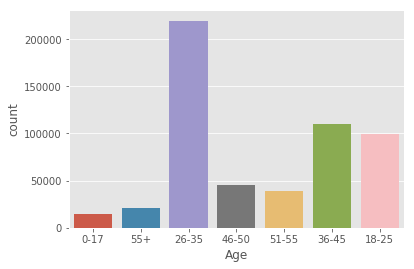

In [160]:
sns.countplot(train['Age'])

### age group of 26 to 35 are purchasing more products then others,
### now, compare between occupation


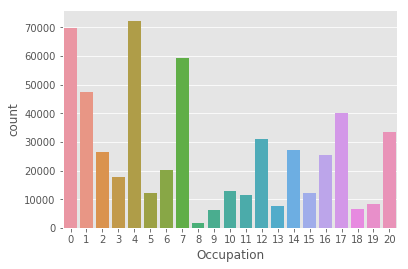

In [161]:
sns.countplot(train['Occupation'])

### fourth number occupation is dominating in purchasing more products
### comparision between type of city

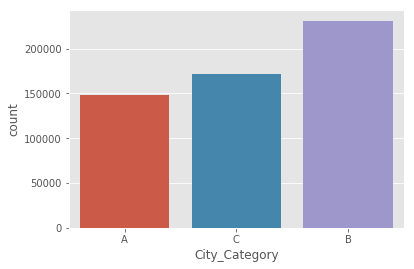

In [162]:
sns.countplot(train['City_Category'])

### B level city catogery are dominating
### Now we will compare the residence dominence


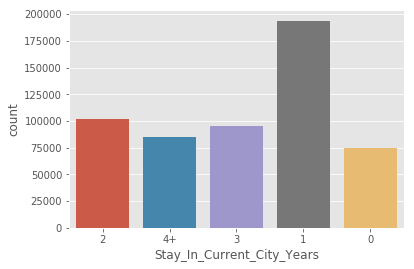

In [163]:
sns.countplot(train['Stay_In_Current_City_Years'])

### let's check how many unique product has been purchased 

In [164]:
train['Product_ID'].nunique()

3631

### Let's check how many unique customer has purchased

In [165]:
train['User_ID'].nunique()

5891

## now let's extract total ocupation by using np
## np.unique - it gives sorted unique element of an array

In [166]:
def unique(column):
    x = np.array(column)
    print(np.unique(x))
    
print("unique id number of customer occupation:")
unique(train['Occupation'])    
    

unique id number of customer occupation:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


### Sum of money spent by each occupation.
## By using list , we will calculate sum of each occupation expenses

In [167]:
Occupation = list(range(0 , 21))
money_spent = []

for i in Occupation:
    money_spent.append(train[train['Occupation']==i]["Purchase"].sum())
print(money_spent)

[635406958, 424614144, 238028583, 162002168, 666244484, 113649759, 188416784, 557371587, 14737388, 54340046, 115844465, 106751618, 305449446, 71919481, 259454692, 118960211, 238346955, 393281453, 60721461, 73700617, 296570442]


In [168]:
# enumerate function returns two parameters
# 1. i which is index
# 2. the value itself from the specified variable(list/dictionary/tuple)
print({i:v for i,v in enumerate(money_spent)})

{0: 635406958, 1: 424614144, 2: 238028583, 3: 162002168, 4: 666244484, 5: 113649759, 6: 188416784, 7: 557371587, 8: 14737388, 9: 54340046, 10: 115844465, 11: 106751618, 12: 305449446, 13: 71919481, 14: 259454692, 15: 118960211, 16: 238346955, 17: 393281453, 18: 60721461, 19: 73700617, 20: 296570442}


In [169]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [170]:
type(money_spent)

list

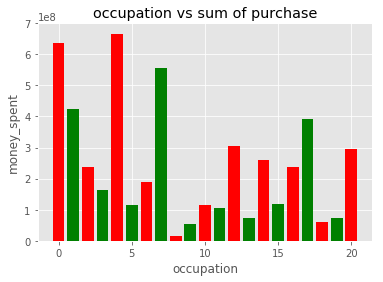

In [171]:

# plotting a bar chart 
plt.bar(range(0, 21), money_spent, 
        width = 0.8, color = ['red', 'green']) 
  
# naming the x-axis 
plt.xlabel('occupation') 
# naming the y-axis 
plt.ylabel('money_spent') 
# plot title 
plt.title('occupation vs sum of purchase') 
  
# function to show the plot 
plt.show() 

### 4th occupation is spending more money to purchase

In [172]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

In [173]:
corr = numeric_features.corr()
 
print (corr['Purchase'].sort_values(ascending = False))


Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


### Highest correlation is 0.020833 of occupation and other side product_category_1 has -0.343703 as a negative impact, which is very small.

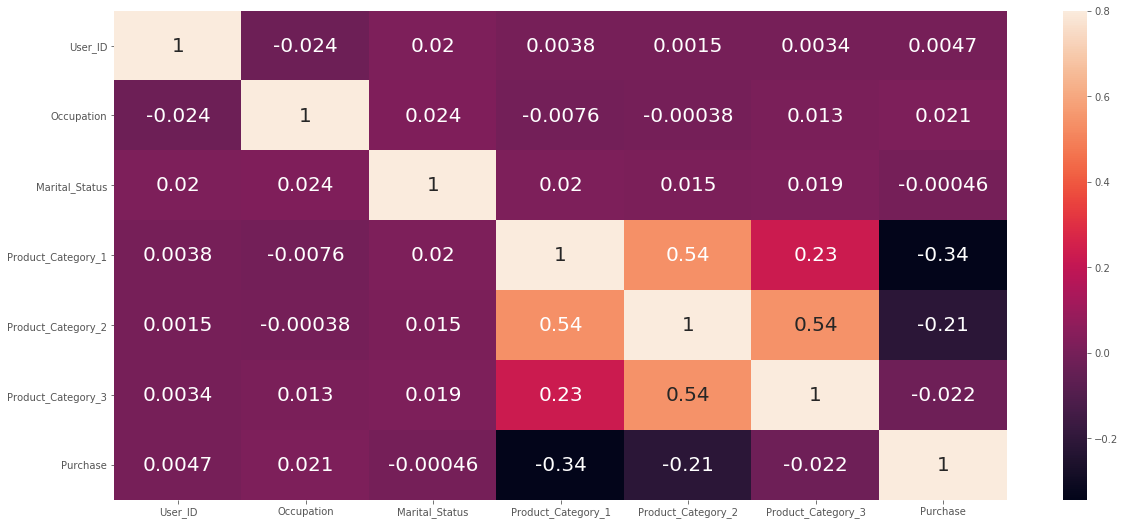

In [174]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True);


In [175]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

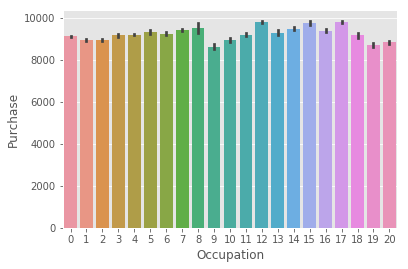

In [176]:
sns.barplot(x = 'Occupation', y = 'Purchase', data = train)

### Here we can see, occupation 12 has invested more money on buying products

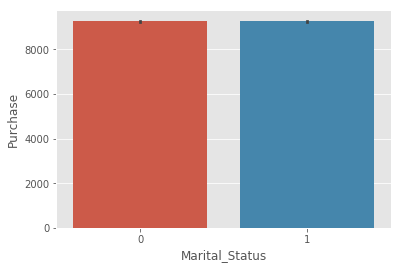

In [177]:
sns.barplot(x = "Marital_Status", y = 'Purchase', data = train)

### Here we can see that both ahve invested equal amount

### Now we will check which product has highes puchase value

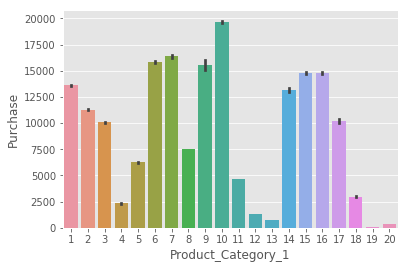

In [178]:
sns.barplot(x = "Product_Category_1", y = "Purchase", data = train)

### So product_category_1 has more purchase value compare to other product
### we will check for product_category_2

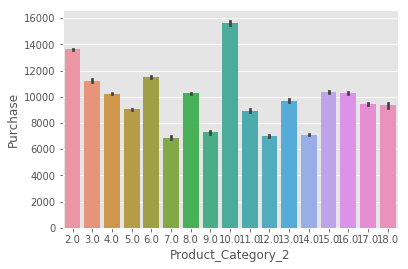

In [179]:
sns.barplot(x = "Product_Category_2", y = "Purchase", data = train)

### it is same like product_category_1
### same we will check for product_category_3

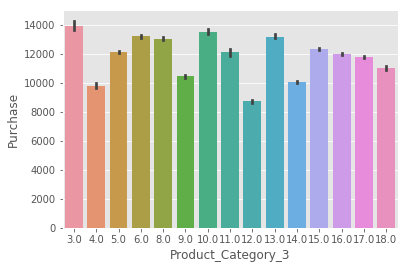

In [180]:
sns.barplot(x = "Product_Category_3", y = "Purchase", data = train)

### In product_category_3, 3rd product has maximum purchase values.
### now, gender v/s purchase

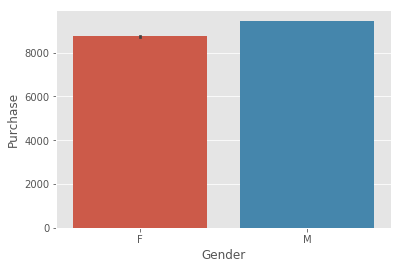

In [181]:
sns.barplot(x = 'Gender', y = 'Purchase', data = train)

### Male has invested more compared to female

### we will check now for Age group

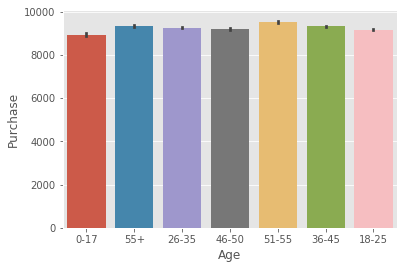

In [182]:
sns.barplot(x = 'Age', y = 'Purchase', data = train)

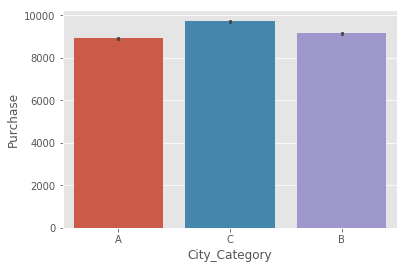

In [183]:
sns.barplot(x = 'City_Category', y = 'Purchase', data = train)

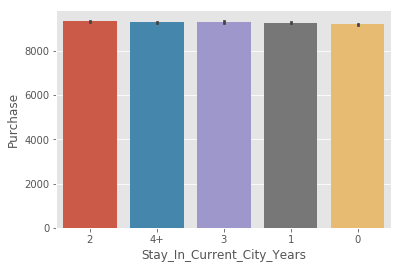

In [184]:
sns.barplot(x = "Stay_In_Current_City_Years", y = 'Purchase', data = train )

### Now we will concatenate the train and test using source, here soucre we are using to keep it easy while seperating again

In [185]:
train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], ignore_index = True, sort = False)

data.shape

(783667, 13)

In [186]:
data.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
599123,1003650,P00111042,M,26-35,0,A,2,0,15,NaN,NaN,NaN,test
335943,1003727,P00295342,M,36-45,7,B,1,0,2,8.0,NaN,16060.0,train
230017,1005482,P00112442,M,18-25,7,A,1,0,6,8.0,NaN,20358.0,train
453256,1003792,P00125142,M,26-35,6,A,1,0,11,NaN,NaN,4664.0,train
652756,1002181,P0096842,M,26-35,0,B,4+,1,3,4.0,12.0,NaN,test
706035,1000117,P00070942,M,26-35,17,A,2,1,3,5.0,16.0,NaN,test
529549,1003592,P00219842,F,55+,2,B,2,1,5,NaN,NaN,8763.0,train
419050,1004448,P00203142,M,26-35,14,A,0,0,16,NaN,NaN,20907.0,train
374463,1003661,P00118742,M,36-45,12,C,0,1,5,11.0,NaN,8807.0,train
455487,1004085,P00165442,F,26-35,6,A,1,0,1,15.0,16.0,11627.0,train


In [187]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

### here we can see that there are 3 columns with missing values, so here we are filling missing values to product_category_2 by -1.0

In [188]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(-1.0).astype('float')

data["Product_Category_2"].value_counts().sort_index()

-1.0     245982
 2.0      70498
 3.0       4123
 4.0      36705
 5.0      37165
 6.0      23575
 7.0        854
 8.0      91317
 9.0       8177
 10.0      4420
 11.0     20230
 12.0      7801
 13.0     15054
 14.0     78834
 15.0     54114
 16.0     61687
 17.0     19104
 18.0      4027
Name: Product_Category_2, dtype: int64

##### Droping Product_Category_3, because we have 30% data inside Product_Category_3  and 69% in Product_Category_2. So we can impute 30% with mean, but we can't impute in Product_Category_3, because 70% artificial data may ruin to future machine learning model.

In [189]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'source'],
      dtype='object')

In [190]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,-1.0,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,-1.0,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,-1.0,NaN,7969.0,train
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0,train
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0,train
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0,train
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0,train
9,1000005,P00274942,M,26-35,20,A,1,1,8,-1.0,NaN,7871.0,train


In [191]:
data['Product_Category_2'].fillna((data['Product_Category_2'].mean()), inplace=True)

In [192]:
data['Product_Category_2'].isna().sum()

0

In [193]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,-1.0,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,-1.0,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,-1.0,NaN,7969.0,train


In [194]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]


In [195]:
#data = data.drop(['Product_Category_3'], axis=1)


In [196]:
#data = data.drop(['User_ID', 'Product_ID'], axis=1)



In [197]:
#data= data.drop(['source'], axis = True)

In [198]:
df_Gender = pd.get_dummies(train['Gender'])
df_Age = pd.get_dummies(train['Age'])
df_City_Category = pd.get_dummies(train['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(train['Stay_In_Current_City_Years'])
df_Marital_Status = pd.get_dummies(train['Marital_Status'])

df_final_train = pd.concat([train, df_Gender, df_Age,df_City_Category,df_Marital_Status,df_Stay_In_Current_City_Years], axis = 1)

df_final_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,A,B,C,0,1,0,1,2,3,4+
0,1000001,P00069042,F,0-17,10,A,2,0,3,-1.0,...,1,0,0,1,0,0,0,1,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,1,0,0,1,0,0,0,1,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,-1.0,...,1,0,0,1,0,0,0,1,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,1,0,0,1,0,0,0,1,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,-1.0,...,0,0,1,1,0,0,0,0,0,1


In [199]:
x = df_final_train[['Occupation','Marital_Status','Product_Category_2','F','M','0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+', 'A','B','C','0','1','0','1','2','3','4+']]
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 22 columns):
Occupation            550068 non-null int64
Marital_Status        550068 non-null int64
Product_Category_2    550068 non-null float64
F                     550068 non-null uint8
M                     550068 non-null uint8
0-17                  550068 non-null uint8
18-25                 550068 non-null uint8
26-35                 550068 non-null uint8
36-45                 550068 non-null uint8
46-50                 550068 non-null uint8
51-55                 550068 non-null uint8
55+                   550068 non-null uint8
A                     550068 non-null uint8
B                     550068 non-null uint8
C                     550068 non-null uint8
0                     550068 non-null uint8
1                     550068 non-null uint8
0                     550068 non-null uint8
1                     550068 non-null uint8
2                     550068 non-null uint8
3      

In [200]:
x.head()

,Occupation,Marital_Status,Product_Category_2,F,M,0-17,18-25,26-35,36-45,46-50,...,A,B,C,0,1,0,1,2,3,4+
0,10,0,-1.0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,10,0,6.0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,10,0,-1.0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,10,0,14.0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,16,0,-1.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [201]:
test.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            162562
Purchase                      233599
source                             0
dtype: int64

In [202]:
test.drop(columns= ['Purchase'])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,source
550068,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,test
550069,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,test
550070,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,test
550071,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,test
550072,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,test
550073,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0,test
550074,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0,test
550075,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0,test
550076,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0,test
550077,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN,test


In [203]:
y = train['Purchase']
y.dtypes

dtype('float64')

In [204]:
y.isnull().sum()

0

### Spliting the data

In [205]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [206]:
y_train.isnull().sum()

0

### Implimenting the linear regression

In [207]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.fit(x_train, y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


### finding the values of cofficient of x 

In [208]:
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns = ['coefficient'])
print(coeff_df)

                    coefficient
Occupation             7.801497
Marital_Status       -54.189135
Product_Category_2    49.587824
F                   -333.903165
M                    333.903165
0-17                -354.670557
18-25                 -1.502881
26-35                 97.052917
36-45                130.001240
46-50                -47.192138
51-55                281.669791
55+                 -105.358371
A                   -347.689935
B                   -118.577693
C                    466.267628
0                    -18.316434
1                    -11.639368
0                    -18.316434
1                    -11.639368
2                     45.307675
3                     34.696918
4+                   -50.048790


### Dummification of categorical values

## By taking x_test as input to check that how well our data performed

In [210]:
prediction = lm.predict(x_test)
prediction

array([8848.96498637, 8256.30996124, 9526.72828796, ..., 8034.99921584,
       9900.93263004, 9483.47140268])

### Calculating Mean square error and mean absolute error

In [211]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))


MAE: 4030.3147407831175
MSE: 24942173.525545757
